Downloaded: SpaceX (22600 chars)
Downloaded: NASA (39383 chars)
Downloaded: International Space Station (116393 chars)


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Failed: Mars
Downloaded: Apollo 11 (53207 chars)
Downloaded: Hubble Space Telescope (87173 chars)
Failed: James Webb Space Telescope
Downloaded: Rocket (30998 chars)
Downloaded: Satellite (25866 chars)
Downloaded: Astronaut (28778 chars)
Downloaded: Moon landing (56978 chars)
Downloaded: Space Shuttle (64098 chars)
Failed: Solar System
Downloaded: Galaxy (51083 chars)
Downloaded: Black hole (69052 chars)
Downloaded: Nebula (11998 chars)
Downloaded: Supernova (66269 chars)
Failed: Milky Way
Downloaded: Andromeda Galaxy (36344 chars)
Downloaded: Exoplanet (53619 chars)
Failed: Mars rover

Total corpus length: 813855 characters
Approximate word count: 128430

Total words in corpus: 128430
Unique words: 18773
After filtering rare words: 112250 words
Vocabulary size: 5279
Number of training pairs: 673488

epoch 1: loss=6.8880
epoch 50: loss=4.4859
epoch 100: loss=3.9116
epoch 150: loss=3.4701
epoch 200: loss=3.3983

Embedding shape: (5279, 100)

Found 66 space-related words in vocabulary
Sa

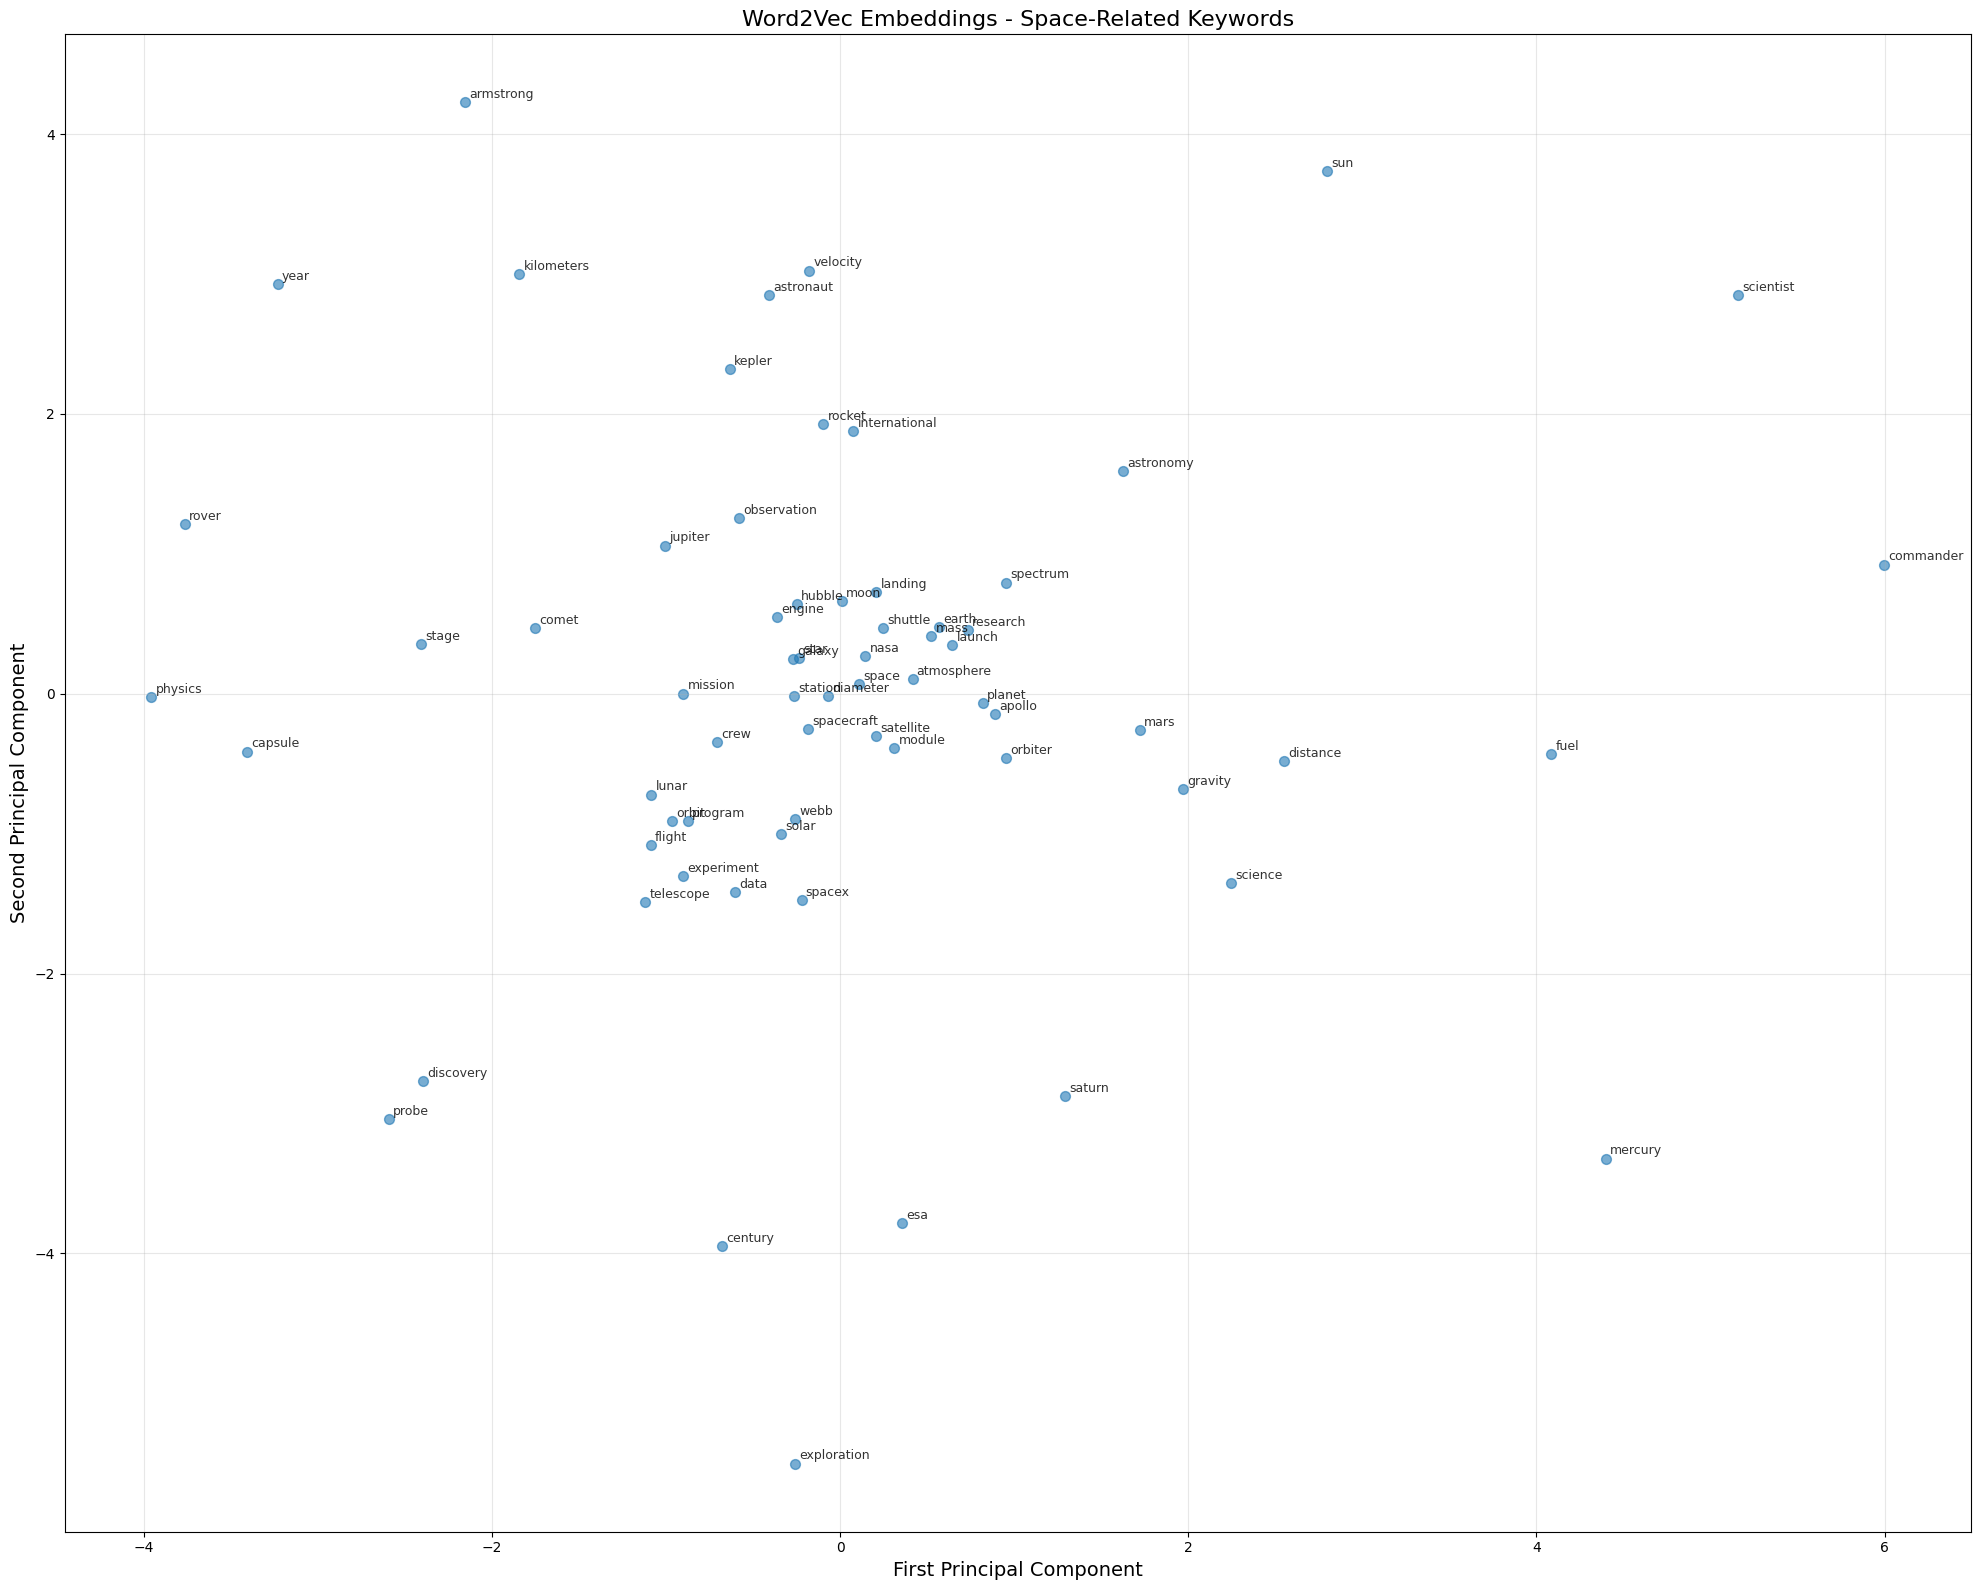


Visualized 66 keywords


In [3]:
# Install and import wikipedia library
!pip install wikipedia

import wikipedia
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download multiple Wikipedia articles about space
topics = ["SpaceX", "NASA", "International Space Station", "Mars",
          "Apollo 11", "Hubble Space Telescope", "James Webb Space Telescope",
          "Rocket", "Satellite", "Astronaut", "Moon landing", "Space Shuttle",
          "Solar System", "Galaxy", "Black hole", "Nebula", "Supernova",
          "Milky Way", "Andromeda Galaxy", "Exoplanet", "Mars rover"]

corpus_text = ""

for topic in topics:
    try:
        article = wikipedia.page(topic)
        corpus_text += article.content + " "
        print(f"Downloaded: {topic} ({len(article.content)} chars)")
    except:
        print(f"Failed: {topic}")

print(f"\nTotal corpus length: {len(corpus_text)} characters")
print(f"Approximate word count: {len(corpus_text.split())}")

# Process the corpus
corpus = corpus_text.lower().replace('\n', ' ').split()
print(f"\nTotal words in corpus: {len(corpus)}")
print(f"Unique words: {len(set(corpus))}")

# Filter out very rare words (setting 3 as the threshold)
word_counts = Counter(corpus)
min_count = 3
corpus = [w for w in corpus if word_counts[w] >= min_count]
print(f"After filtering rare words: {len(corpus)} words")

# Build vocabulary
vocab = sorted(set(corpus))
vocab_size = len(vocab)
stoi = {w: i for i, w in enumerate(vocab)}
itos = {i: w for w, i in stoi.items()}
ids = [stoi[w] for w in corpus]

print(f"Vocabulary size: {vocab_size}")

# Build skip-gram pairs
pairs = []
window = 3
for i, c in enumerate(ids):
    L = max(0, i - window)
    R = min(len(ids), i + window + 1)
    for j in range(L, R):
        if j != i:
            pairs.append((c, ids[j]))

print(f"Number of training pairs: {len(pairs)}\n")

centers = torch.tensor([c for c, _ in pairs], dtype=torch.long, device=device)
contexts = torch.tensor([x for _, x in pairs], dtype=torch.long, device=device)

# Model: 100-d embeddings + negative sampling
embed_dim = 100
num_neg = 5

emb_in = nn.Embedding(vocab_size, embed_dim).to(device)
emb_out = nn.Embedding(vocab_size, embed_dim).to(device)

optimizer = optim.SGD(list(emb_in.parameters()) + list(emb_out.parameters()), lr=0.05)

def skipgram_neg_loss(centers, contexts, num_neg=5):
    B = centers.shape[0]
    # Positive score
    c = emb_in(centers)
    pos = emb_out(contexts)
    pos_score = torch.sum(c * pos, dim=1)
    pos_loss = torch.log(torch.sigmoid(pos_score) + 1e-9).neg().mean()

    # Negative sampling
    neg_ids = torch.randint(0, vocab_size, (B, num_neg), device=device)
    neg = emb_out(neg_ids)
    neg_score = torch.einsum("bd,bkd->bk", c, neg)
    neg_loss = torch.log(torch.sigmoid(-neg_score) + 1e-9).neg().mean()
    return pos_loss + neg_loss

# Create DataLoader for mini-batch training
dataset = TensorDataset(centers, contexts)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True)

# Training loop
for epoch in range(200):
    for batch_centers, batch_contexts in dataloader:
        optimizer.zero_grad()
        loss = skipgram_neg_loss(batch_centers, batch_contexts, num_neg=num_neg)
        loss.backward()
        optimizer.step()
    if epoch == 0 or (epoch+1) % 50 == 0:
        print(f"epoch {epoch+1}: loss={loss.item():.4f}")

# Extract learned embeddings
word_vec = emb_in.weight.detach().cpu().numpy()
print(f"\nEmbedding shape: {word_vec.shape}")

# Choose which words to visualize relationship for
space_words = ['mars', 'earth', 'moon', 'sun', 'jupiter', 'saturn', 'venus', 'mercury', 'planet', 'star', 'galaxy', 'asteroid', 'comet', 'nasa', 'spacex', 'esa', 'apollo', 'shuttle', 'voyager', 'hubble', 'webb', 'curiosity', 'perseverance', 'cassini', 'kepler', 'station', 'international', 'satellite', 'telescope', 'rover', 'orbiter', 'probe', 'spacecraft', 'orbit', 'launch', 'mission', 'flight', 'landing', 'rocket', 'space', 'lunar', 'solar', 'gravity', 'atmosphere', 'astronaut', 'crew', 'commander', 'scientist', 'armstrong', 'exploration', 'research', 'discovery', 'observation', 'experiment', 'engine', 'fuel', 'module', 'capsule', 'stage', 'astronomy', 'physics', 'science', 'data', 'spectrum', 'distance', 'mass', 'velocity', 'diameter', 'kilometers', 'year', 'program', 'century']
indices_to_plot = [stoi[word] for word in space_words if word in stoi]
words_to_plot = [itos[i] for i in indices_to_plot]
vectors_to_plot = word_vec[indices_to_plot]

print(f"\nFound {len(words_to_plot)} space-related words in vocabulary")
print(f"Sample words: {words_to_plot[:20]}")

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
word_vec_2d = pca.fit_transform(vectors_to_plot)

print(f"\nVisualizing {len(words_to_plot)} selected space keywords")

# Create visualization
plt.figure(figsize=(20, 16))
plt.scatter(word_vec_2d[:, 0], word_vec_2d[:, 1], alpha=0.6, s=50)

for i, word in enumerate(words_to_plot):
    plt.annotate(word,
                 xy=(word_vec_2d[i, 0], word_vec_2d[i, 1]),
                 xytext=(3, 3),
                 textcoords='offset points',
                 fontsize=9,
                 alpha=0.8)

plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.title('Word2Vec Embeddings - Space-Related Keywords', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVisualized {len(words_to_plot)} keywords")